<a href="https://colab.research.google.com/github/FelipeAugus/dio-baires-dev--machine-learning-training-ipynb/blob/main/03-teoria-aprendizado-estatistico/metricas-avaliacao-aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

# + 1e-10 é aplicado para evitar divisões por 0 (zero)

In [2]:
mock_matriz_confusao = np.array([
    [50, 2, 1, 0, 0, 0, 0, 0, 0, 0],
    [3, 45, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 55, 2, 0, 0, 0, 0, 0, 0],
    [0, 0, 2, 48, 3, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 52, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 2, 49, 4, 0, 0, 0],
    [0, 0, 0, 0, 0, 3, 58, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 2, 51, 3, 0],
    [0, 1, 0, 0, 0, 0, 0, 4, 47, 2],
    [0, 0, 0, 0, 0, 0, 0, 0, 5, 40]
])
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

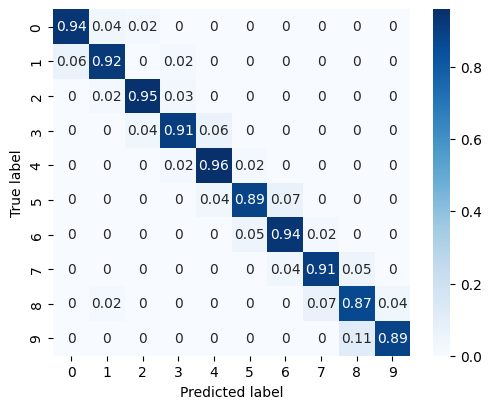

In [3]:
import pandas as pd

con_mat_norm = np.around(mock_matriz_confusao.astype('float') / mock_matriz_confusao.sum(axis=1)[:, np.newaxis], decimals=2)

figure = plt.figure(figsize=(5, 4))
sns.heatmap(con_mat_norm, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [4]:
# Extraindo VP, VN, FP e FN da mock_matriz_confusao para cada classe

num_classes = mock_matriz_confusao.shape[0]

VP_per_class = np.zeros(num_classes)
VN_per_class = np.zeros(num_classes)
FP_per_class = np.zeros(num_classes)
FN_per_class = np.zeros(num_classes)

total_samples = np.sum(mock_matriz_confusao)

for i in range(num_classes):
    # VP (Verdadeiros Positivos): elementos corretamente classificados da classe i
    VP_per_class[i] = mock_matriz_confusao[i, i]
    # FN (Falsos Negativos): exemplos da classe i que foram classificados como outras classes
    FN_per_class[i] = np.sum(mock_matriz_confusao[i, :]) - VP_per_class[i]
    # FP (Falsos Positivos): exemplos de outras classes que foram incorretamente classificados como classe i
    FP_per_class[i] = np.sum(mock_matriz_confusao[:, i]) - VP_per_class[i]
    # VN (Verdadeiros Negativos): todos os exemplos que não são da classe i e foram corretamente classificados como não sendo da classe i
    VN_per_class[i] = total_samples - VP_per_class[i] - FN_per_class[i] - FP_per_class[i]

# print("Métricas por Classe:")
# for i in range(num_classes):
#     print(f"Classe {i}:")
#     print(f"  VP = {VP_per_class[i]}")
#     print(f"  VN = {VN_per_class[i]}")
#     print(f"  FP = {FP_per_class[i]}")
#     print(f"  FN = {FN_per_class[i]}")

In [5]:
prec_per_class = VP_per_class / (VP_per_class + FP_per_class + 1e-10)
recall_per_class = VP_per_class / (VP_per_class + FN_per_class + 1e-10)
f1_per_class = 2 * prec_per_class * recall_per_class / (prec_per_class + recall_per_class + 1e-10)
accuracy_per_class = (VP_per_class + VN_per_class) / (VP_per_class + VN_per_class + FP_per_class + FN_per_class + 1e-10)

macro_precision = np.mean(prec_per_class)
macro_recall = np.mean(recall_per_class)
macro_f1 = np.mean(f1_per_class)
macro_accuracy = np.mean(accuracy_per_class)
specificity_per_class = VN_per_class / (VN_per_class + FP_per_class + 1e-10)
macro_specificity = np.mean(specificity_per_class)
balanced_accuracy = np.mean((recall_per_class + specificity_per_class) / 2)

print(f"Macro Acurácia: {macro_accuracy:.4f}")
print(f"Macro Sensibilidade: {macro_recall:.4f}")
print(f"Macro Especificidade: {macro_specificity:.4f}")
print(f"Macro Precisão: {macro_precision:.4f}")
print(f"Macro F-Score: {macro_f1:.4f}")
print(f"Balanced Acurácia: {balanced_accuracy:.4f}")

Macro Acurácia: 0.9837
Macro Sensibilidade: 0.9175
Macro Especificidade: 0.9909
Macro Precisão: 0.9194
Macro F-Score: 0.9182
Balanced Acurácia: 0.9542


In [6]:
VP = np.sum(VP_per_class)
FN = np.sum(FN_per_class)
FP = np.sum(FP_per_class)
VN = np.sum(VN_per_class)

print("\nTotais (para Micro-average):")
print(f"VP total: {VP}")
print(f"VN total: {VN}")
print(f"FP total: {FP}")
print(f"FN total: {FN}")


Totais (para Micro-average):
VP total: 495.0
VN total: 4807.0
FP total: 44.0
FN total: 44.0


In [7]:
def calc_acuracia(VP, VN, FP, FN): return (VP + VN) / (VP + VN + FP + FN + 1e-10)
def calc_sensibilidade(VP, FN): return VP / (VP + FN + 1e-10)
def calc_especificidade(VN, FP): return VN / (VN + FP + 1e-10)
def calc_precisao(VP, FP): return VP / (VP + FP + 1e-10)
def calc_fscore(precisao, sensibilidade): return 2 * (precisao * sensibilidade) / (precisao + sensibilidade + 1e-10)

acc = calc_acuracia(VP, VN, FP, FN)
recall = calc_sensibilidade(VP, FN)
especificidade = calc_especificidade(VN, FP)
precisao = calc_precisao(VP, FP)
fscore = calc_fscore(precisao, recall)

print(f"Acurácia: {acc:.4f}")
print(f"Sensibilidade: {recall:.4f}")
print(f"Especificidade: {especificidade:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"F-score: {fscore:.4f}")

Acurácia: 0.9837
Sensibilidade: 0.9184
Especificidade: 0.9909
Precisão: 0.9184
F-score: 0.9184


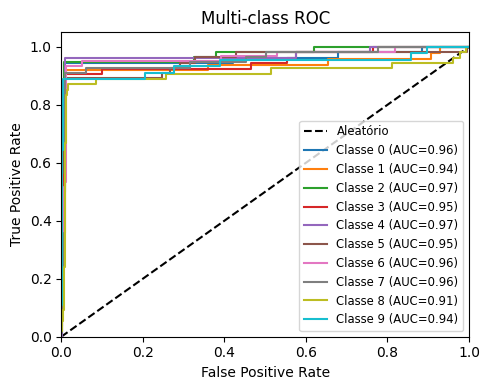

In [8]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

########## ##########  MOCKADO!  ########## ##########
mock_y_true, mock_y_pred = [], []
for true_cls in classes:
    for pred_cls in classes:
        cnt = mock_matriz_confusao[true_cls, pred_cls]
        mock_y_true += [true_cls] * cnt
        mock_y_pred += [pred_cls] * cnt

y_true = np.array(mock_y_true)
y_pred = np.array(mock_y_pred)

n_samples = len(y_true)
n_classes = len(classes)

rng = np.random.RandomState(0)
y_score = rng.rand(n_samples, n_classes) * 0.1
y_score[np.arange(n_samples), y_pred] += 0.9
y_score /= y_score.sum(axis=1, keepdims=True)

y_true_bin = label_binarize(y_true, classes=classes)
########## ########## ########## ########## ##########


# One-vs-Rest para cada classe
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = sum(np.interp(all_fpr, fpr[i], tpr[i]) for i in range(n_classes)) / n_classes
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


plt.figure(figsize=(5, 4))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório') # Linha central
for i in range(n_classes): # Linha por classe
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC={roc_auc[i]:.2f})')

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()